In [40]:
import pandas as pd

p1="Bachelors_degree_CSV.csv"
p2="Masters_degree_CSV.csv"
p3="Doctrate_degree_CSV.csv"

df1=pd.read_csv(p1)
df2=pd.read_csv(p2)
df3=pd.read_csv(p3)

In [41]:
df3.drop([1,2,34,35,36,37,38],0,inplace=True);
df2.drop([1,2,36,37,38,39,40],0,inplace=True);
df1.drop([1,2,36,37,38,39,40],0,inplace=True);

In [42]:
df1=df1.rename(columns=df1.iloc[0]).drop(df1.index[0])
df2=df2.rename(columns=df2.iloc[0]).drop(df2.index[0])
df3=df3.rename(columns=df3.iloc[0]).drop(df3.index[0])

In [43]:
df1=df1.fillna(0)
df2=df2.fillna(0)
df3=df3.fillna(0)



In [44]:
df1

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
3,Agriculture and natural resources\1\,"12,672","19,402","21,886","16,823","13,124","21,425","23,370","23,052","26,343","28,630","30,972","33,592","35,125","36,278","36,995","37,734","39,317","40,458"
4,Architecture and related services,"5,570","9,146","9,455","9,119","9,781","8,352","8,480","9,515","10,051","9,831","9,727","9,757","9,149","9,090","8,825","8,579","8,464","8,806"
5,"Area, ethnic, cultural, gender, and group studies","2,579","3,577","2,887","3,021","4,776","5,633","6,160","7,878","8,620","8,955","9,228","8,850","8,275","7,783","7,840","7,720","7,717","7,724"
6,Biological and biomedical sciences,"35,705","54,154","43,078","38,395","39,482","61,014","60,576","70,602","86,391","89,984","95,850","100,397","104,657","109,904","113,794","116,768","118,661","121,191"
7,Business\2\,"115,396","143,171","200,521","236,700","249,165","226,623","263,515","318,043","358,119","365,133","367,235","360,887","358,132","363,741","371,690","381,109","386,240","390,564"
8,"Communication, journalism, and related programs","10,324","20,045","29,428","41,666","51,650","47,320","58,013","73,658","81,280","83,231","83,771","84,818","87,612","90,658","92,551","93,794","92,289","92,528"
9,Communications technologies,478,"1,237","1,854","1,479","1,397",853,"1,178","2,987","4,782","4,858","4,983","4,987","4,991","5,135","4,824","4,615","4,231","4,444"
10,Computer and information sciences,"2,388","5,652","15,121","42,337","25,159","24,506","44,142","47,702","39,593","43,066","47,406","50,961","55,271","59,586","64,402","71,416","79,597","88,633"
11,Education,"176,307","154,437","108,074","87,147","110,807","105,384","105,458","107,235","101,287","104,008","105,656","104,698","98,838","91,596","87,221","85,130","82,599","83,946"
12,Engineering,"45,034","38,733","63,642","77,391","62,448","62,168","58,209","66,841","72,657","76,356","81,371","85,987","92,169","97,852","106,789","115,671","121,953","126,687"


In [45]:
df1 = df1.replace(',','', regex=True)
df2 = df2.replace(',','', regex=True)
df3 = df3.replace(',','', regex=True)

In [46]:
def change_dtype(value):
      try:
          return int(value)
      except ValueError:
          try:
              return float(value)
          except ValueError:
              return value

for column in df1.columns:
      df1.loc[:, column] = df1[column].apply(change_dtype)
for column in df2.columns:
     df2.loc[:, column] = df2[column].apply(change_dtype)
for column in df3.columns:
      df3.loc[:, column] = df3[column].apply(change_dtype)


<AxesSubplot:>

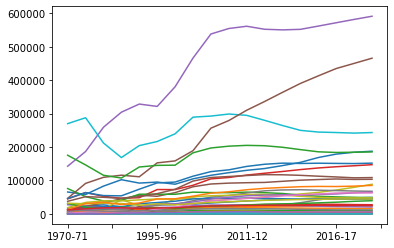

In [63]:
df=pd.concat([df1, df2,df3]).groupby(['Field of study']).sum().reset_index()
df = df.set_index('Field of study').T
df.plot(legend=False)

In [48]:
names=df.iloc[:,0]
names

0                  Agriculture and natural resources\1\
1                     Architecture and related services
2         Area ethnic cultural gender and group studies
3                    Biological and biomedical sciences
4                                           Business\2\
5        Communication journalism and related programs 
6                          Communications technologies 
7                     Computer and information sciences
8                    Computer and information sciences 
9                                             Education
10                                          Engineering
11                          Engineering technologies\3\
12              English language and literature/letters
13          Family and consumer sciences/human sciences
14        Foreign languages literatures and linguistics
15             Health professions and related programs 
16    Homeland security law enforcement and\n   fire...
17    Homeland security law enforcement and\n   

In [49]:
sum=df.sum(axis=1)
sum_df=pd.DataFrame({
    "Major":names,
    "Total": sum
})
sum_df

,Major,Total
0,Agriculture and natural resources\1\,615354
1,Architecture and related services,272090
2,Area ethnic cultural gender and group studies,152036
3,Biological and biomedical sciences,1769003
4,Business\2\,8005249
5,Communication journalism and related programs,1348640
6,Communications technologies,67043
7,Computer and information sciences,410081
8,Computer and information sciences,806938
9,Education,4542301


In [50]:
sum_df=sum_df.sort_values(by="Total",ascending=False)

In [51]:
sum_df

,Major,Total
4,Business\2\,8005249
15,Health professions and related programs,4674604
9,Education,4542301
32,Social sciences and history,3099231
10,Engineering,2213784
30,Psychology,2050360
3,Biological and biomedical sciences,1769003
35,Visual and performing arts,1595296
5,Communication journalism and related programs,1348640
31,Public administration and social services,1053149
